<a href="https://colab.research.google.com/github/KamonohashiPerry/MachineLearning/blob/master/Causal_Inference/Python_Causal_Inference_Chap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# 乱数のシードの固定
import random
import numpy as np

random.seed(1234)
np.random.seed(1234)


# Scipy 平均0、分散1に正規化（標準化）関数
import scipy.stats
# 標準正規分布の生成用
from numpy.random import *

# シグモイド関数
from scipy.special import expit

# グラフの描画用
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [35]:
# データ数
num_data = 200

# 年齢
x_1 = randint(15, 76, num_data) # 15から75歳の一様乱数

# 性別(0を女性、1を男性とする)
x_2 = randint(0, 2, num_data) # 0か1の乱数


### テレビCMを見たかどうかのデータの作成

In [36]:
# ノイズの生成
e_z = randn(num_data)

# シグモイド関数に入れるデータ
z_base = x_1 + (1-x_2)*10 - 40 + 5*e_z

# シグモイド関数の計算
z_prob = expit(0.1*z_base)

# テレビCMを見たかどうかの変数(0は見ていない、1は見た)
Z = np.array([])

for i in range(num_data):
  Z_i = np.random.choice(2, size=1, p=[1-z_prob[i], z_prob[i]])[0]
  Z = np.append(Z, Z_i)

### 購入量のデータの作成

In [37]:
# ノイズの生成
e_y = randn(num_data)

Y = -x_1 + 30*x_2 + 10*Z + 80 + 10*e_y

df = pd.DataFrame({'年齢':x_1,
                   '性別':x_2,
                   'CMを見た':Z,
                   '購入量':Y})
df.head()

,年齢,性別,CMを見た,購入量
0,62,0,1.0,24.464285
1,34,0,0.0,45.693411
2,53,1,1.0,64.998281
3,68,1,1.0,47.186898
4,27,1,0.0,100.114260


In [38]:
# 平均値の比較
print(df[df['CMを見た'] == 1.0].mean())
print('---------')
print(df[df['CMを見た'] == 0.0].mean())

年齢       55.836066
性別        0.483607
CMを見た     1.000000
購入量      49.711478
dtype: float64
---------
年齢       32.141026
性別        0.692308
CMを見た     0.000000
購入量      68.827143
dtype: float64


### 決定木による分類

In [39]:
# scikit-learnから決定木をimport
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 説明変数
X = df[['年齢', '性別']]

# 被説明変数（目的変数）
Z = df['CMを見た']

# データを訓練データと検証データに分割
X_train, X_val, Z_train, Z_val = train_test_split(X, Z, train_size=0.6, random_state=0)

# 学習と性能確認
clf = DecisionTreeClassifier(max_depth=1, random_state=0)
clf.fit(X_train, Z_train)
print('深さ1の性能：', clf.score(X_val, Z_val))

# 学習と性能確認
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Z_train)
print('深さ2の性能：', clf.score(X_val, Z_val))

# 学習と性能確認
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, Z_train)
print('深さ3の性能：', clf.score(X_val, Z_val))

深さ1の性能： 0.85
深さ2の性能： 0.85
深さ3の性能： 0.825


### 決定木による回帰

In [40]:
# scikit-learnから決定木の回帰をimport
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 説明変数
X = df[['年齢', '性別']]

# 被説明変数（目的変数）
Y = df['購入量']

# データを訓練データと検証データに分割
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.6, random_state=0)

# 学習と性能確認
reg = DecisionTreeRegressor(max_depth=2, random_state=0)
reg.fit(X_train, Y_train)
print('深さ1の性能：', reg.score(X_val, Y_val))

# 学習と性能確認
reg = DecisionTreeRegressor(max_depth=3, random_state=0)
reg.fit(X_train, Y_train)
print('深さ2の性能：', reg.score(X_val, Y_val))

# 学習と性能確認
reg = DecisionTreeRegressor(max_depth=4, random_state=0)
reg.fit(X_train, Y_train)
print('深さ3の性能：', reg.score(X_val, Y_val))

深さ1の性能： 0.7257496664596153
深さ2の性能： 0.7399348963931736
深さ3の性能： 0.7165539691159019


### ランダムフォレストで分類

In [41]:
# scikit-learnから決定木をimport
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 説明変数
X = df[['年齢', '性別']]

# 被説明変数（目的変数）
Z = df['CMを見た']

# データを訓練データと検証データに分割
X_train, X_val, Z_train, Z_val = train_test_split(X, Z, train_size=0.6, random_state=0)

# 学習と性能確認
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, Z_train)
print('深さ1の性能：', clf.score(X_val, Z_val))

# 学習と性能確認
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Z_train)
print('深さ2の性能：', clf.score(X_val, Z_val))

# 学習と性能確認
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, Z_train)
print('深さ3の性能：', clf.score(X_val, Z_val))

深さ1の性能： 0.775
深さ2の性能： 0.85
深さ3の性能： 0.825


### ランダムフォレストによる回帰

In [42]:
# scikit-learnから決定木の回帰をimport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 説明変数
X = df[['年齢', '性別']]

# 被説明変数（目的変数）
Y = df['購入量']

# データを訓練データと検証データに分割
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.6, random_state=0)

# 学習と性能確認
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, Y_train)
print('深さ1の性能：', reg.score(X_val, Y_val))

# 学習と性能確認
reg = RandomForestRegressor(max_depth=3, random_state=0)
reg.fit(X_train, Y_train)
print('深さ2の性能：', reg.score(X_val, Y_val))

# 学習と性能確認
reg = RandomForestRegressor(max_depth=4, random_state=0)
reg.fit(X_train, Y_train)
print('深さ3の性能：', reg.score(X_val, Y_val))

深さ1の性能： 0.7618786062003249
深さ2の性能： 0.7810610687821996
深さ3の性能： 0.7655149049335735


## Meta-Learners
+ 非線形な因果関係および処置効果を扱える因果推論手法
 + T-Learner：2つ（介入を受けた場合のモデル、受けてない場合のモデル）
 + S-Learner：1つのモデルで説明変数で介入に関するものを扱っているモデル
 + X-Learner：2つのモデルで処置効果を推定し、傾向スコアを用いて補正したもの

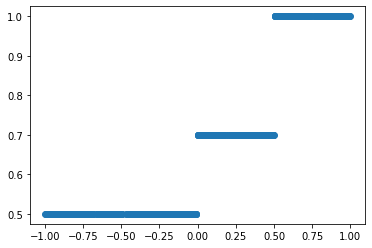

In [43]:
# データ数
num_data = 500

# 部下育成への熱心さ(-1から1の一様乱数)
x = np.random.uniform(low=-1, high=1, size=num_data)

# 上司が上司向けの研修に参加したかどうか 
e_z = randn(num_data)
z_prob = expit(-0.5*x + 5*e_z)
Z = np.array([])

for i in range(num_data):
  Z_i = np.random.choice(2, size=1, p=[1-z_prob[i], z_prob[i]])[0]
  Z = np.append(Z, Z_i)

# 介入効果の非線形性
t = np.zeros(num_data)
for i in range(num_data):
  if x[i] < 0:
    t[i] = 0.5
  elif x[i] >= 0 and x[i] < 0.5:
    t[i] = 0.7
  elif x[i] >= 0.5:
    t[i] = 1.0

e_y = randn(num_data)
Y = 2.0 + t*Z + 0.3*x + 0.1*e_y

# 介入効果を図で確認
plt.scatter(x, t, label='treatment-effect');

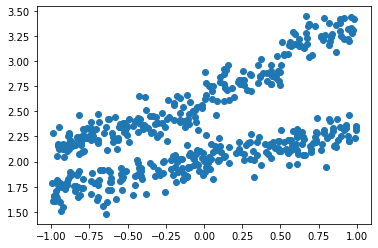

In [44]:
df = pd.DataFrame({'x':x,
                     'Z':Z,
                     't':t,
                     'Y':Y})
df.head()
plt.scatter(x, Y);

### T-Learner

In [45]:
# 集団を二つに分ける
df_0 = df[df.Z == 0.0]
df_1 = df[df.Z == 1.0]

# ランダムフォレストモデルを作成
from sklearn.ensemble import RandomForestRegressor

# 介入を受けていないモデル
reg_0 = RandomForestRegressor(max_depth=3)
reg_0.fit(df_0[['x']], df_0[['Y']])

# 介入を受けたモデル
reg_1 = RandomForestRegressor(max_depth=3)
reg_1.fit(df_1[['x']], df_1[['Y']])

# ATEを求める
mu_0 = reg_0.predict(df[['x']])
mu_1 = reg_1.predict(df[['x']])

ATE = (mu_1 - mu_0).mean()
print('ATE：', ATE)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ATE： 0.6690778607847381


In [46]:
# 処置群における平均処理効果ATTと対照群における平均処置効果ATU
ATT = df_1['Y'] - reg_0.predict(df_1[['x']]) # 介入受けた場合の、受けてない場合のモデルで予測したものの差分
ATU = reg_1.predict(df_0[['x']]) - df_0['Y'] # 介入受けてない場合のデータで予測したものの差分

print('ATT：', ATT.mean())
print('ATU：', ATU.mean())

ATT： 0.6572957460842328
ATU： 0.680305578569483


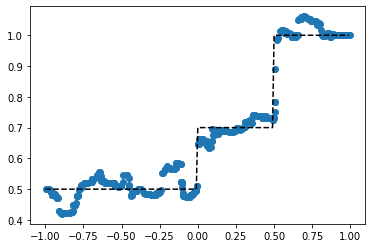

In [47]:
# 推定された処置効果を各人ごとに求める
t_estimated = reg_1.predict(df[['x']]) - reg_0.predict(df[['x']])

plt.scatter(df[['x']], t_estimated, label='estimated_treatment-effect');

# 正解のグラフを作成
x_index = np.arange(-1, 1, 0.01)
t_ans = np.zeros(len(x_index))
for i in range(len(x_index)):
  if x_index[i] < 0:
    t_ans[i] = 0.5
  elif x_index[i] >= 0 and x_index[i] < 0.5:
    t_ans[i] = 0.7
  elif x_index[i] >= 0.5:
    t_ans[i] = 1.0

# 正解を描画
plt.plot(x_index, t_ans, color='black', ls='--', label='Baseline');

### S-Learner

In [48]:
# ランダムフォレストモデルを作成
from sklearn.ensemble import RandomForestRegressor

# モデルを学習
reg = RandomForestRegressor(max_depth=4)
X = df.loc[:, ['x', 'Z']]
reg.fit(X, df[['Y']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
# 処置が0と1の状態を作成する
X_0 = X.copy()
X_0['Z'] = 0.0

X_1 =X.copy()
X_1['Z'] = 1.0

# ATEの計算
ATE = (reg.predict(X_1) - reg.predict(X_0)).mean()
print('ATE：', ATE)

ATE： 0.6697146803338992


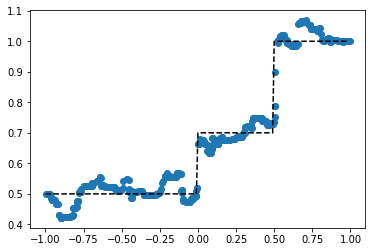

In [50]:
# 推定された処置効果を各人ごとに求める
t_estimated = reg.predict(X_1) - reg.predict(X_0)
plt.scatter(df[['x']], t_estimated,
            label='estimated_treatment-effect')

# 正解を描画
plt.plot(x_index, t_ans, color='black', ls='--', label='Baseline')

### X-Learner

In [51]:
# T-LearnerでM0とM1を求める
from sklearn.ensemble import RandomForestRegressor

# 集団を二つに分ける
df_0 = df[df.Z == 0.0]
df_1 = df[df.Z == 1.0]

# 介入を受けていないモデル
M0 = RandomForestRegressor(max_depth=3)
M0.fit(df_0[['x']], df_0[['Y']])

# 介入を受けたモデル
M1 = RandomForestRegressor(max_depth=3)
M1.fit(df_1[['x']], df_1[['Y']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
# 推定された処置効果を各人ごとに求める
tau_0 = reg_1.predict(df_0[['x']]) - df_0['Y']
tau_1 = df_1['Y'] - reg_0.predict(df_1[['x']])

# ATTとATUを求めるモデルの作成
M2 = RandomForestRegressor(max_depth=3)
M2.fit(df_0[['x']], tau_0)

M3 = RandomForestRegressor(max_depth=3)
M3.fit(df_1[['x']], tau_1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

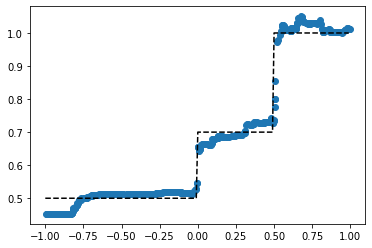

In [53]:
# 傾向スコアの計算
from sklearn.linear_model import LogisticRegression

# 説明変数
X = df[['x']]

# 被説明変数
Z = df['Z']

# 回帰の実施
g_x = LogisticRegression().fit(X, Z)
g_x_val = g_x.predict_proba(X)

# それぞれのモデルで全データの効果を予測し、傾向スコアで調整
tau = g_x_val[:, 1]*M2.predict(df[['x']]) + g_x_val[:, 0]*M3.predict(df[['x']])

# 推定された処理効果を各人ごとに求める
plt.scatter(df[['x']], tau, label='estimated_treatment-effect');

# 正解を描画
plt.plot(x_index, t_ans, color='black', ls='--', label='Baseline');

## Doubly Robust Learning
+ 2つのモデルで推定
+ モデルとの誤差を計算し、傾向スコアで重み付け
+ 重み付けして計算した各人の効果について、回帰する

In [55]:
# ランダムフォレストモデルを作成
from sklearn.ensemble import RandomForestRegressor

# 集団を2つに分ける
df_0 = df[df.Z == 0.0]
df_1 = df[df.Z == 1.0]

# 介入を受けていないモデル
M_0 = RandomForestRegressor(max_depth=3)
M_0.fit(df_0[['x']], df_0[['Y']])

# 介入を受けたモデル
M_1 = RandomForestRegressor(max_depth=3)
M_1.fit(df_1[['x']], df_1[['Y']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
# 傾向スコアを計算する
from sklearn.linear_model import LogisticRegression

# 説明変数
X = df[['x']]

# 被説明変数
Z = df['Z']

# 回帰の実施
g_x = LogisticRegression().fit(X, Z)
g_x_val = g_x.predict_proba(X)

# 処置群
Y_1 = M_1.predict(df_1[['x']]) + (df_1['Y'] - M_1.predict(df_1[['x']]))/ g_x.predict_proba(df_1[['x']])[:, 1]
df_1['ITE'] = Y_1 - M_0.predict(df_1[['x']])

# 非処置群
Y_0 = M_0.predict(df_0[['x']]) + (df_0['Y'] - M_0.predict(df_0[['x']]))/ g_x.predict_proba(df_0[['x']])[:, 0]
df_0['ITE'] =  M_1.predict(df_0[['x']]) - Y_0

# 表を結合する
df_DR = pd.concat([df_0, df_1])
df_DR.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,x,Z,t,Y,ITE
0,0.557126,0.0,1.0,2.118638,1.080144
1,0.096866,0.0,0.7,2.020414,0.779141
2,0.226904,0.0,0.7,2.199642,0.496733
5,0.550420,0.0,1.0,2.082679,1.146809
7,0.578411,0.0,1.0,2.160682,1.018021


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


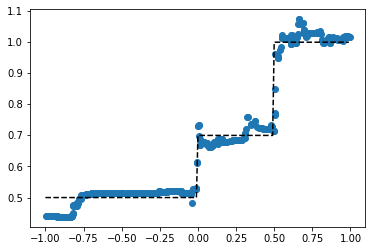

In [62]:
# モデルM_DRを構築し、各人の処置効果をモデルから求める
# モデルM_DR
M_DR = RandomForestRegressor(max_depth=3)
M_DR.fit(df_DR[['x']], df_DR[['ITE']])

# 推定された処置効果を各人ごとに計算する
t_estimated = M_DR.predict(df_DR[['x']])
plt.scatter(df_DR[['x']], t_estimated,
            label='estimated_treatment-effect');

# 正解のグラフを作成
x_index = np.arange(-1, 1, 0.01)
t_ans = np.zeros(len(x_index))
for i in range(len(x_index)):
  if x_index[i] < 0:
    t_ans[i] = 0.5
  elif x_index[i] >= 0 and x_index[i] < 0.5:
    t_ans[i] = 0.7
  elif x_index[i] >= 0.5:
    t_ans[i] = 1.0

# 正解を描画
plt.plot(x_index, t_ans, color='black', ls='--', label='Baseline');